### Importación de datos



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [4]:
# Crear un diccionario con los datos de las tiendas
tiendas = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

# Calcular y mostrar los ingresos de cada tienda
for nombre, datos in tiendas.items():
    ingreso_total = datos['Precio'].sum()
    print(f"Ingreso total {nombre}: ${int(ingreso_total):,}".replace(",", "."))


Ingreso total Tienda 1: $1.150.880.400
Ingreso total Tienda 2: $1.116.343.500
Ingreso total Tienda 3: $1.098.019.600
Ingreso total Tienda 4: $1.038.375.700


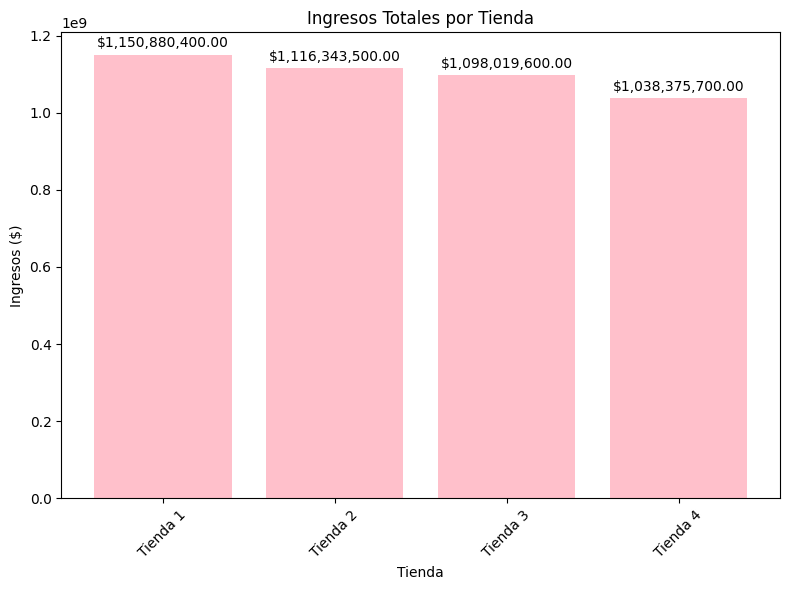

In [6]:
import matplotlib.pyplot as plt

# Calcular los ingresos totales
ingresos = {nombre: datos['Precio'].sum() for nombre, datos in tiendas.items()}

# Crear gráfico de barras
plt.figure(figsize=(8, 6))
barras = plt.bar(ingresos.keys(), ingresos.values(), color='pink')
plt.title('Ingresos Totales por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Ingresos ($)')
plt.xticks(rotation=45)

# Mostrar valores encima de cada barra
for barra in barras:
    y = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, y + y*0.01, f'${y:,.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [7]:
# Calcular las categorías más populares por tienda
categorias_por_tienda = {
    nombre: datos.groupby('Categoría del Producto').size()
    .reset_index(name='Cantidad de ventas')
    .sort_values(by='Cantidad de ventas', ascending=False)
    for nombre, datos in tiendas.items()
}

# Mostrar las categorías más populares de cada tienda
for nombre, categorias in categorias_por_tienda.items():
    print(f"\nCategorías más populares {nombre}:")
    print(categorias)


Categorías más populares Tienda 1:
    Categoría del Producto  Cantidad de ventas
7                  Muebles                 465
3             Electrónicos                 448
5                 Juguetes                 324
2        Electrodomésticos                 312
1     Deportes y diversión                 284
4   Instrumentos musicales                 182
6                   Libros                 173
0  Artículos para el hogar                 171

Categorías más populares Tienda 2:
    Categoría del Producto  Cantidad de ventas
7                  Muebles                 442
3             Electrónicos                 422
5                 Juguetes                 313
2        Electrodomésticos                 305
1     Deportes y diversión                 275
4   Instrumentos musicales                 224
6                   Libros                 197
0  Artículos para el hogar                 181

Categorías más populares Tienda 3:
    Categoría del Producto  Cantidad de ventas

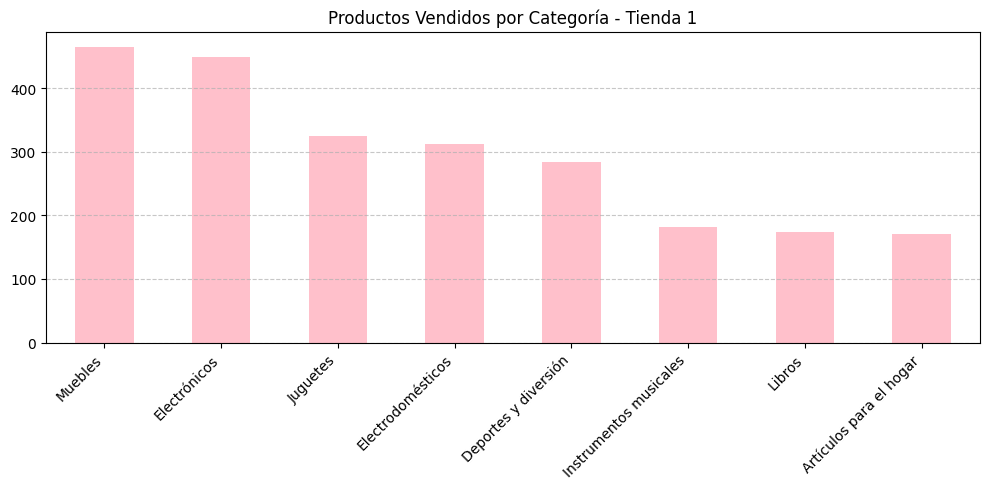

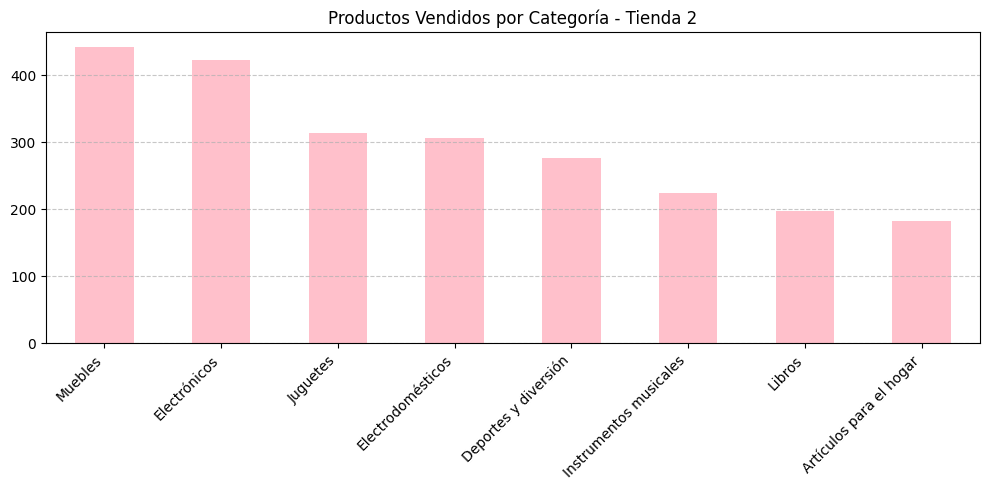

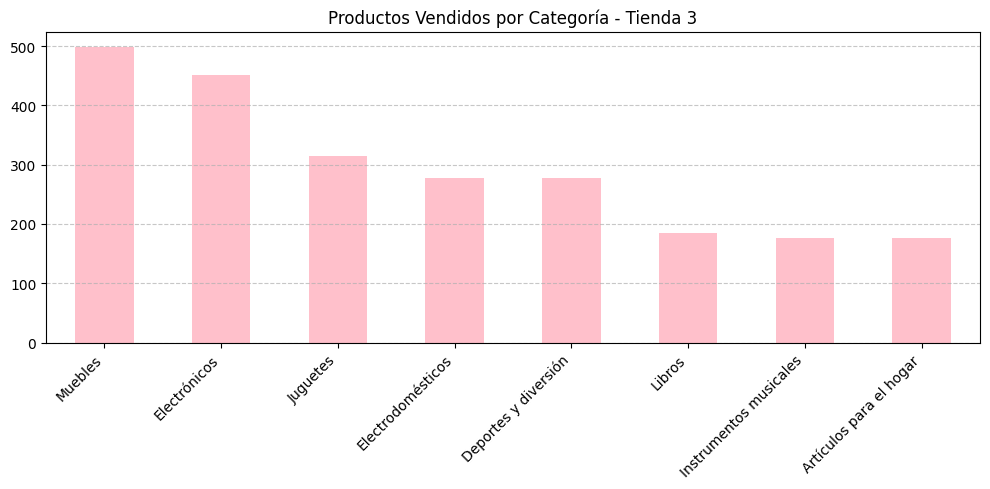

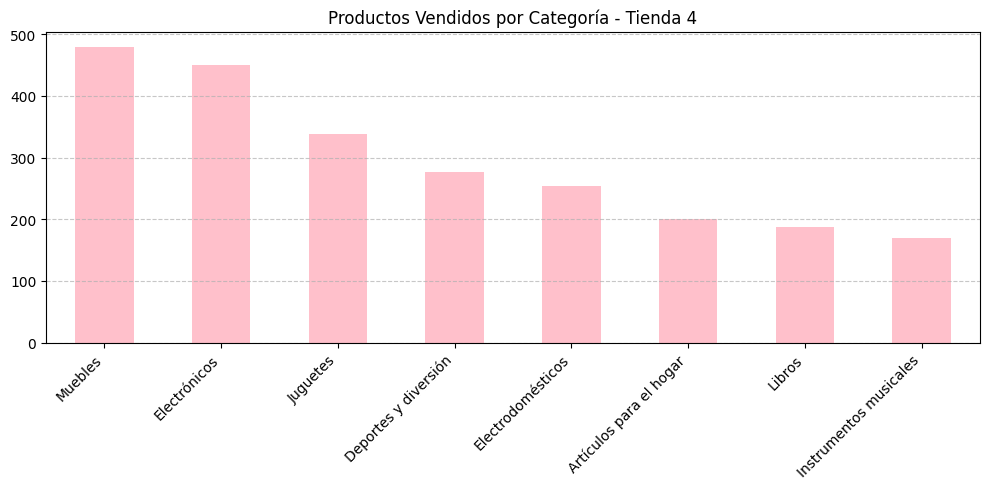

In [8]:
import matplotlib.pyplot as plt

# Función para graficar categorías de productos vendidos
def graficar_categorias(data, nombre_tienda):
    categorias = data['Categoría del Producto'].value_counts()

    plt.figure(figsize=(10, 5))
    categorias.plot(kind='bar', color='pink')
    plt.title(f'Productos Vendidos por Categoría - {nombre_tienda}')
    plt.xlabel('')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Iterar sobre las tiendas y graficar
for nombre, datos in tiendas.items():
    graficar_categorias(datos, nombre)

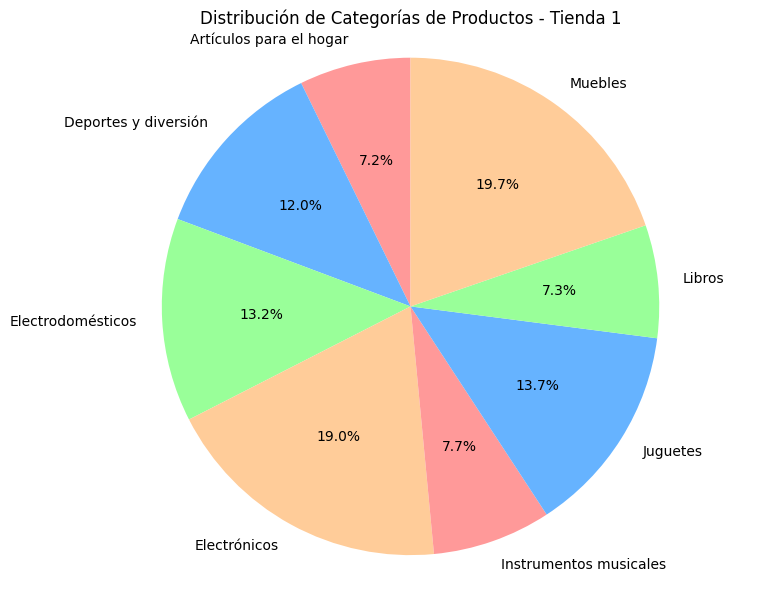

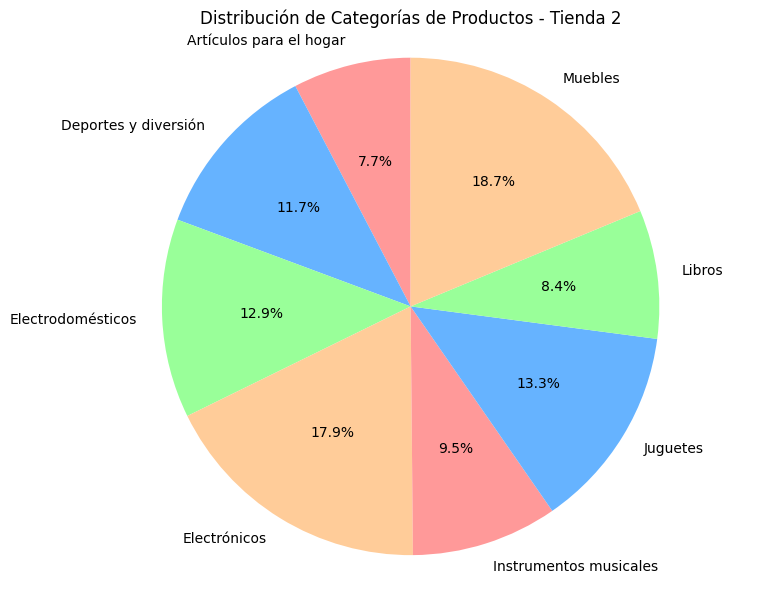

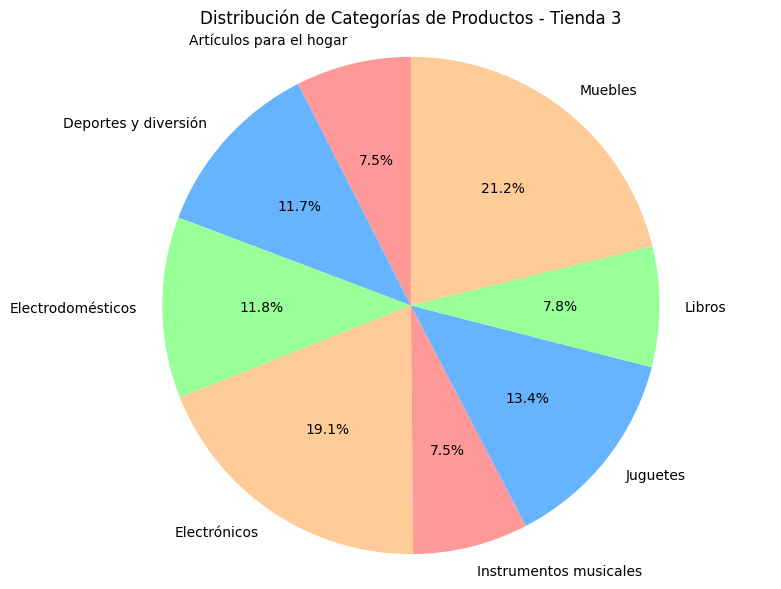

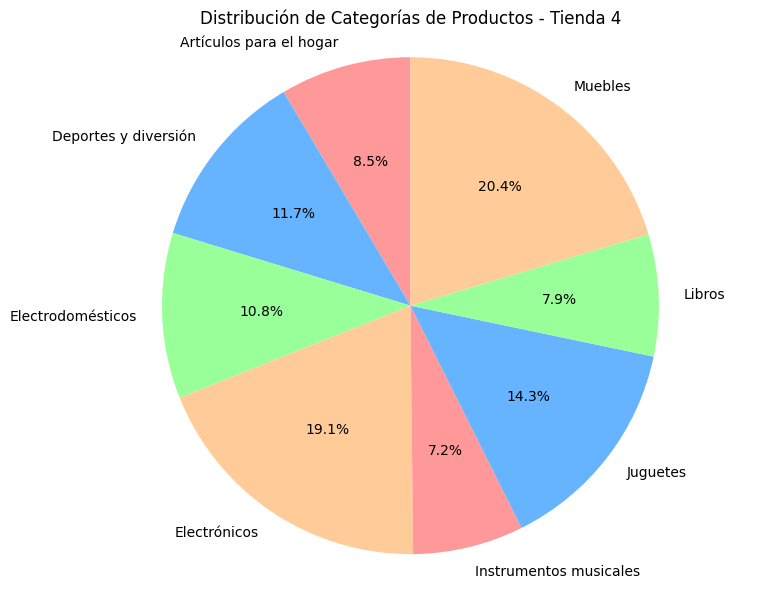

In [9]:
import matplotlib.pyplot as plt

# Limpiar los nombres de las columnas
for datos in tiendas.values():
    datos.columns = datos.columns.str.strip()

# Función para graficar la distribución de categorías de productos
def graficar_pie(data, nombre_tienda):
    categorias = data.groupby('Categoría del Producto').size().reset_index(name='Cantidad de ventas')

    plt.figure(figsize=(8, 6))
    plt.pie(categorias['Cantidad de ventas'], labels=categorias['Categoría del Producto'],
            autopct='%1.1f%%', startangle=90,
            colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])
    plt.title(f'Distribución de Categorías de Productos - {nombre_tienda}')
    plt.axis('equal')  # Mantener forma circular
    plt.tight_layout()
    plt.show()

# Iterar sobre las tiendas y graficar
for nombre, datos in tiendas.items():
    graficar_pie(datos, nombre)

# 3. Calificación promedio de la tienda


In [10]:
# Calcular las calificaciones promedio
calificaciones_promedio = {nombre: datos['Calificación'].mean() for nombre, datos in tiendas.items()}

# Mostrar las calificaciones promedio
for nombre, calificacion in calificaciones_promedio.items():
    print(f"Calificación promedio {nombre}: {calificacion:.2f}")

Calificación promedio Tienda 1: 3.98
Calificación promedio Tienda 2: 4.04
Calificación promedio Tienda 3: 4.05
Calificación promedio Tienda 4: 4.00


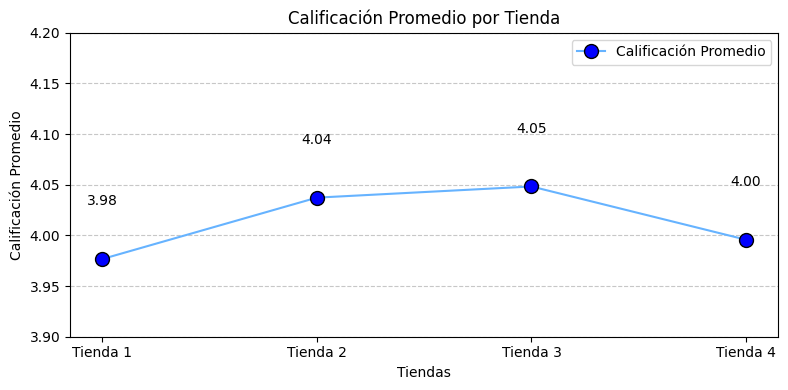

In [11]:
import matplotlib.pyplot as plt

# Calcular las calificaciones promedio
calificaciones_promedio = {nombre: datos['Calificación'].mean() for nombre, datos in tiendas.items()}

# Crear gráfico lineal
plt.figure(figsize=(8, 4))
plt.plot(calificaciones_promedio.keys(), calificaciones_promedio.values(),
         marker='o', markersize=10, markeredgecolor='black',
         markerfacecolor='blue', color='#66b3ff', label='Calificación Promedio')

# Título y etiquetas
plt.title('Calificación Promedio por Tienda')
plt.xlabel('Tiendas')
plt.ylabel('Calificación Promedio')
plt.ylim(3.9, 4.2)  # Suponiendo que la calificación está en una escala de 0 a 5

# Agregar líneas de cuadrícula
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agregar etiquetas a cada punto
for nombre, calificacion in calificaciones_promedio.items():
    plt.text(nombre, calificacion + 0.05, f"{calificacion:.2f}", ha='center', va='bottom')

# Mostrar la leyenda
plt.legend()

# Ajustar diseño y mostrar la gráfica
plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

In [12]:
import matplotlib.pyplot as plt

# Calcular los productos más y menos vendidos por tienda
ventas_por_tienda = {
    nombre: datos.groupby('Producto').size()
    .reset_index(name='Cantidad de ventas')
    .sort_values(by='Cantidad de ventas', ascending=False)
    for nombre, datos in tiendas.items()
}

# Mostrar los productos más y menos vendidos de cada tienda
for nombre, ventas in ventas_por_tienda.items():
    print(f"\nProductos más vendidos {nombre}:")
    print(ventas.head(1))  # Mostrar el más vendido

    print(f"\nProductos menos vendidos {nombre}:")
    print(ventas.tail(1))  # Mostrar el menos vendido


Productos más vendidos Tienda 1:
  Producto  Cantidad de ventas
1  Armario                  60

Productos menos vendidos Tienda 1:
                    Producto  Cantidad de ventas
4  Auriculares con micrófono                  33

Productos más vendidos Tienda 2:
                     Producto  Cantidad de ventas
24  Iniciando en programación                  65

Productos menos vendidos Tienda 2:
         Producto  Cantidad de ventas
26  Juego de mesa                  32

Productos más vendidos Tienda 3:
         Producto  Cantidad de ventas
27  Kit de bancas                  57

Productos menos vendidos Tienda 3:
                  Producto  Cantidad de ventas
9  Bloques de construcción                  35

Productos más vendidos Tienda 4:
    Producto  Cantidad de ventas
10  Cama box                  62

Productos menos vendidos Tienda 4:
              Producto  Cantidad de ventas
22  Guitarra eléctrica                  33


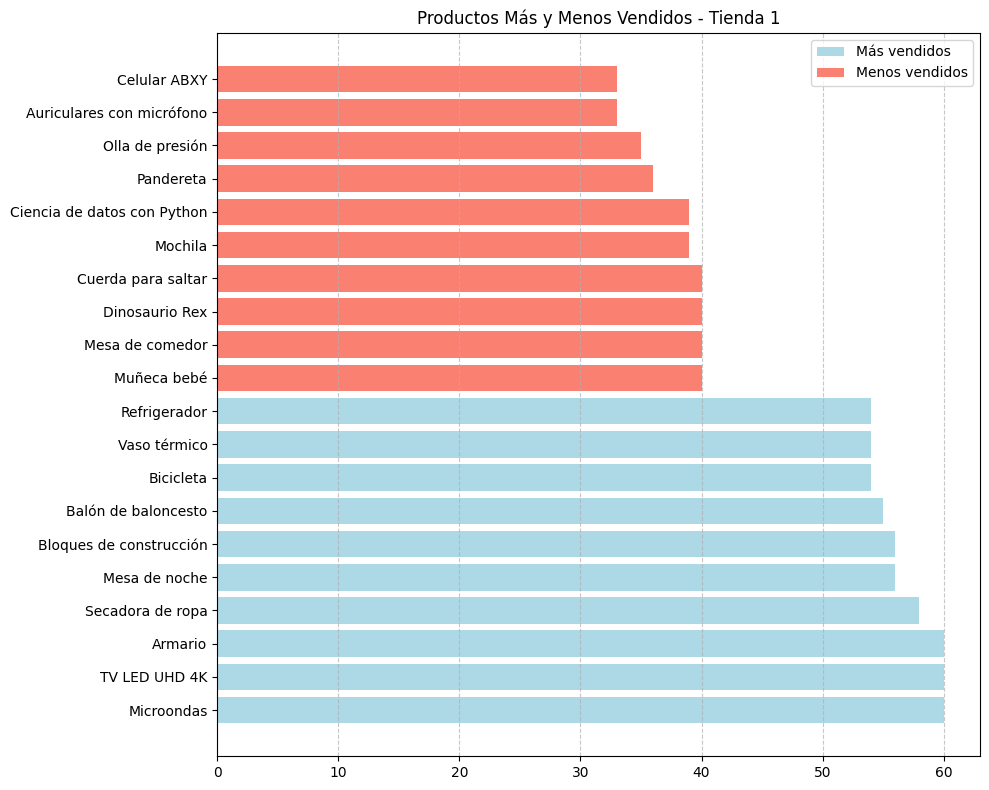

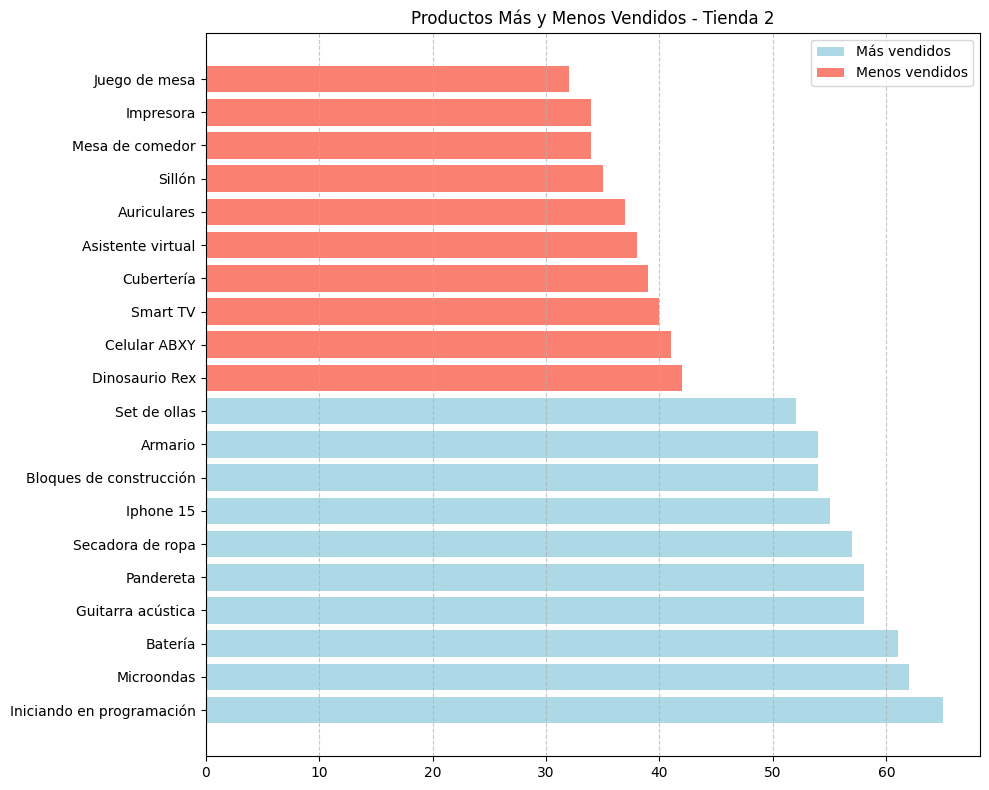

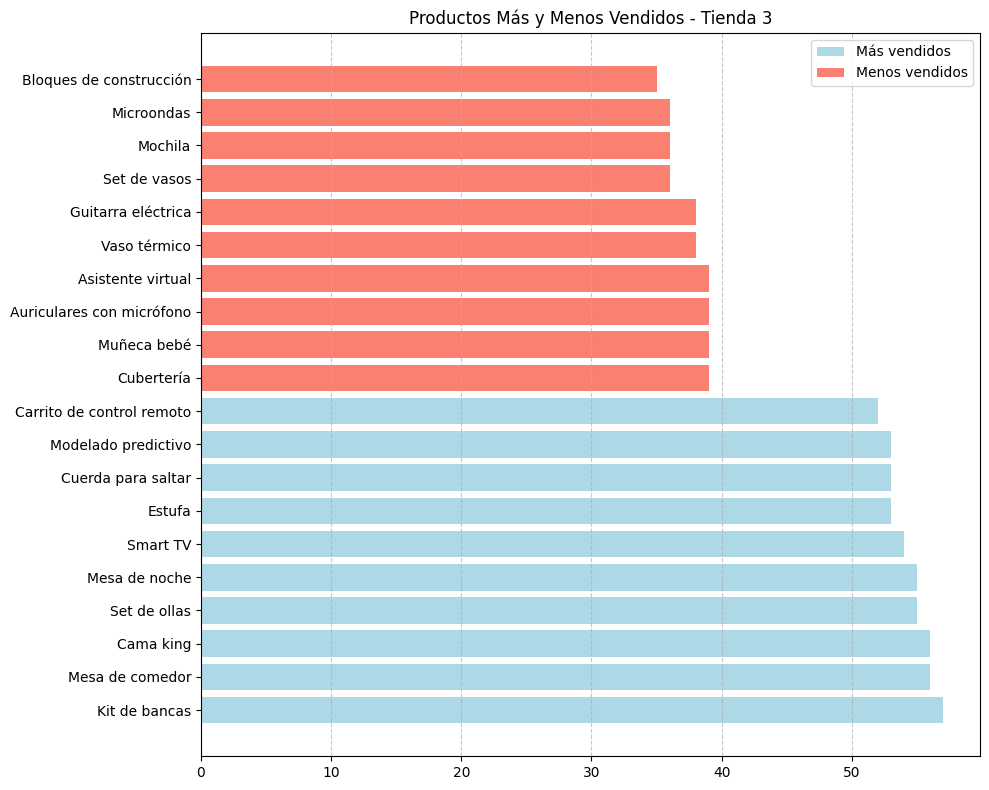

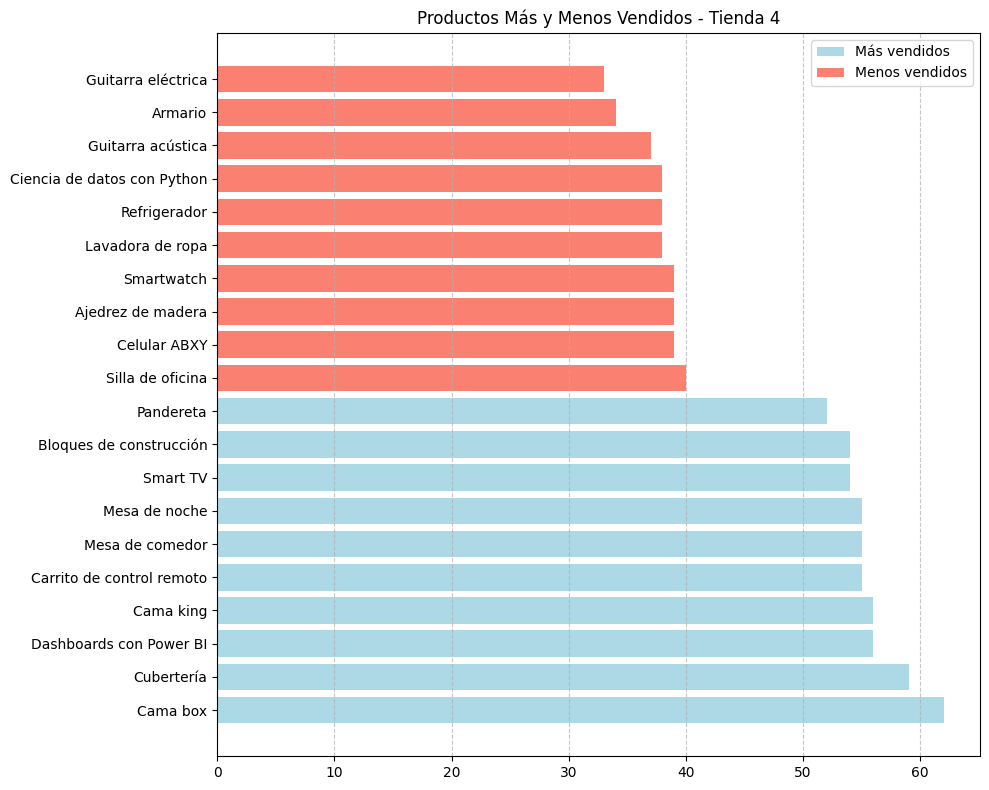

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Función para calcular los productos más y menos vendidos y graficarlos en una sola gráfica
def productos_vendidos(data, tienda_name):
    ventas_por_producto = data['Producto'].value_counts()

    # Obtener los 10 productos más vendidos
    mas_vendidos = ventas_por_producto.head(10)

    # Obtener los 10 productos menos vendidos (ignorando aquellos no vendidos)
    menos_vendidos = ventas_por_producto.tail(10)

    # Crear gráfico combinado de los productos más y menos vendidos
    plt.figure(figsize=(10, 8))

    # Plot de los productos más vendidos
    plt.barh(mas_vendidos.index, mas_vendidos.values, color='lightblue', label='Más vendidos')

    # Plot de los productos menos vendidos
    plt.barh(menos_vendidos.index, menos_vendidos.values, color='salmon', label='Menos vendidos')

    # Título y etiquetas
    plt.title(f'Productos Más y Menos Vendidos - {tienda_name}')
    plt.legend()
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Iterar sobre las tiendas y graficar
for nombre, datos in tiendas.items():
    productos_vendidos(datos, nombre)

# 5. Envío promedio por tienda

In [14]:
# Calcular el costo de envío promedio para cada tienda
costos_envio_promedio = {nombre: datos['Costo de envío'].mean() for nombre, datos in tiendas.items()}

# Mostrar los resultados
for nombre, costo in costos_envio_promedio.items():
    print(f"Costo de envío promedio {nombre}: ${int(costo):,}".replace(",", "."))

Costo de envío promedio Tienda 1: $26.018
Costo de envío promedio Tienda 2: $25.216
Costo de envío promedio Tienda 3: $24.805
Costo de envío promedio Tienda 4: $23.459


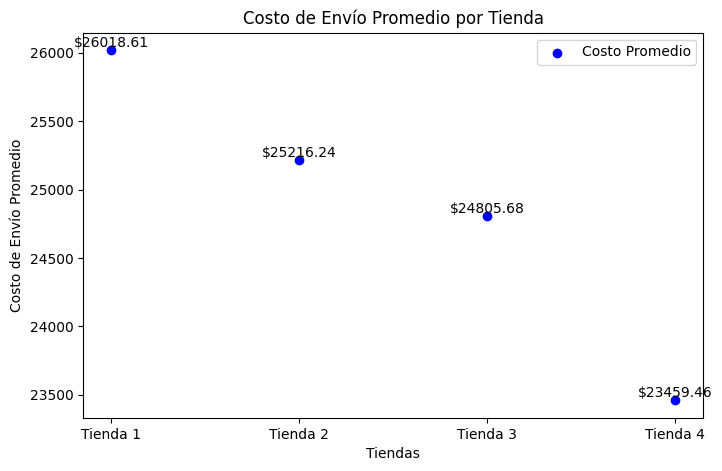

In [15]:
import matplotlib.pyplot as plt

# Calcular el costo de envío promedio para cada tienda
costos_envio_promedio = {nombre: datos['Costo de envío'].mean() for nombre, datos in tiendas.items()}

# Crear gráfico de dispersión
plt.figure(figsize=(8, 5))
plt.scatter(costos_envio_promedio.keys(), costos_envio_promedio.values(), color='blue', label='Costo Promedio')

# Título y etiquetas
plt.title('Costo de Envío Promedio por Tienda')
plt.xlabel('Tiendas')
plt.ylabel('Costo de Envío Promedio')

# Agregar etiquetas a cada punto
for nombre, costo in costos_envio_promedio.items():
    plt.text(nombre, costo + 0.05, f"${costo:.2f}", ha='center', va='bottom')

# Mostrar la leyenda
plt.legend()

# Mostrar la gráfica
plt.show()


# Informe final

##Introducción
El propósito de este informe es analizar los datos de las cuatro tiendas bajo consideración y proporcionar una recomendación clara y fundamentada sobre la mejor opción para el Sr. Juan. Se examinarán diversos factores, como los ingresos totales, productos y categorías vendidas, calificaciones de los clientes y costos de envío promedio.

##Desarrollo

### 1. Ingresos totales
- **Tienda 1:** \$1.150.880.400  
- **Tienda 2:** \$1.116.343.500  
- **Tienda 3:** \$1.098.019.600  
- **Tienda 4:** \$1.038.375.700

La Tienda 1 lidera en ingresos con `$1.150.880.400`, seguida por la Tienda 2 con `$1.116.343.500` y la Tienda 3 con `$1.098.019.600`. La Tienda 4 tiene el menor ingreso total, con `$1.038.375.700`. Este indicador refleja un mayor volumen de ventas en la Tienda 1, aunque las diferencias no son extremadamente amplias entre las demás tiendas.


### 2. Categorías de productos más y menos vendidas
#### Tienda 1
- Más vendida: **Muebles** (465 unidades)  
- Menos vendida: **Artículos para el hogar** (171 unidades)  

#### Tienda 2
- Más vendida: **Muebles** (442 unidades)  
- Menos vendida: **Artículos para el hogar** (181 unidades)  

#### Tienda 3
- Más vendida: **Muebles** (499 unidades)  
- Menos vendida: **Instrumentos musicales** (177 unidades)  

#### Tienda 4
- Más vendida: **Muebles** (480 unidades)  
- Menos vendida: **Instrumentos musicales** (170 unidades)  

En todas las tiendas, las categorías de Muebles y Electrónicos son las más populares, liderando las ventas. Por ejemplo, en la Tienda 3, Muebles tiene 499 unidades vendidas, mientras que categorías como Instrumentos Musicales y Artículos para el Hogar registran menores ventas en todas las tiendas, siendo menos estratégicas en términos de demanda.
### 3. Calificaciones promedio de los clientes
- **Tienda 1:** 3.98  
- **Tienda 2:** 4.04  
- **Tienda 3:** 4.05  
- **Tienda 4:** 4.00

La Tienda 3 destaca con la mejor calificación promedio de 4.05, seguida de la Tienda 2 con 4.04. Aunque las demás tiendas también tienen buenas calificaciones (Tienda 4: 4.00 y Tienda 1: 3.98), esto sugiere una mayor satisfacción de los clientes en las Tiendas 3 y 2.
### 4. Productos más y menos vendidos
#### Tienda 1
- Más vendido: **Armario** (60 unidades)  
- Menos vendido: **Auriculares con micrófono** (33 unidades)  

#### Tienda 2
- Más vendido: **Iniciando en programación** (65 unidades)  
- Menos vendido: **Juego de mesa** (32 unidades)  

#### Tienda 3
- Más vendido: **Kit de bancas** (57 unidades)  
- Menos vendido: **Bloques de construcción** (35 unidades)  

#### Tienda 4
- Más vendido: **Cama box** (62 unidades)  
- Menos vendido: **Guitarra eléctrica** (33 unidades)  

En la Tienda 1, el producto más vendido es el Armario con 60 unidades, mientras que los Auriculares con micrófono tienen una menor demanda, con 33 unidades. En la Tienda 4, la Cama Box es el producto más popular con 62 ventas, pero la Guitarra Eléctrica está al final con 33 unidades. Estos datos reflejan preferencias específicas de los consumidores que podrían influir en las decisiones de venta.
### 5. Costos de envío promedio
- **Tienda 1:** \$26.018  
- **Tienda 2:** \$25.216  
- **Tienda 3:** \$24.805  
- **Tienda 4:** \$23.459

La Tienda 4 presenta el costo de envío promedio más bajo, con `$23.459`, lo cual puede ser un factor diferenciador clave para atraer clientes. En contraste, la Tienda 1 tiene el costo más alto, con `$26.018`, lo que podría representar una desventaja en términos de competitividad.


## Conclusión Basándote en los datos analizados:
Con base en el análisis realizado, se recomienda que el Sr. Juan elija la Tienda 3 como la mejor opción. Esto se fundamenta en las siguientes razones:

- Excelente calificación promedio de los clientes (4.05).

- Alto ingreso total, manteniéndose competitivo respecto a las demás tiendas.

- Productos más vendidos alineados con las preferencias de los consumidores.

- Costo de envío competitivo en comparación con la Tienda 1.

Aunque la Tienda 4 ofrece costos de envío más bajos, su ingreso total es el menor, y sus calificaciones promedio están ligeramente por debajo de las de la Tienda 3. Por lo tanto, la Tienda 3 demuestra un equilibrio sólido entre ingresos, satisfacción del cliente y competitividad en los costos.